<a href="https://colab.research.google.com/github/envgp/taking_the_pulse_of_the_planet/blob/main/notebooks/pulse_toolbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Welcome to the Pulse Toolbox! Here you will find code snippets that will be useful in your assignments. These snippets are shown with examples from some sample datasets, but you can extrapolate these tools to any dataset with a matching format. To quickly navigate to a tool you need, use the navigation button on the lefthand side of the screen (three dots next to three bars; look for the gold infinity symbol at the top left corner of this webpage and then look down a bit), and then click the appropriate header.

While we will require you to do some simple changes to these codes for your assignment, like changing a filepath, a column name, or a plot title, nothing in this course will require extensive custom coding. Your focus for each assignment should be choosing the tools that will help you understand your data and solve the open-ended problems posed to you. A question may have many valid answers, as long as you explain your reasoning and show your data analysis.

Please note that these code snippets are not independent; they may rely on previous code snippets to run properly. If you are getting an error when running a single code snippet, try going to the Runtime button near the top of the webpage and hitting "Run All" to ensure that any requesite cells are run as well.

# Make a copy of this notebook for your own use! At the top left corner of this tab, hit "File" -> "Save a Copy in Drive." You will need to save new copies as this notebook is updated throughout the course.

# Package installation, data downloading, and data loading tools



## Installing and loading Python packages
We need to bring some additional packages into Python. If these packages are not already loaded into your notebook by the instructor, paste these code blocks in to load these libraries. These libraries will help us with manipulating and plotting our data.

In [1]:
!pip install xarray numpy pandas geopandas cartopy==0.19.0.post1 ipywidgets rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp38-cp38-linux_x86_64.whl size=12659564 sha256=a1662d64e25b83803d3e

In [2]:
!pip uninstall -y shapely

Found existing installation: shapely 2.0.0
Uninstalling shapely-2.0.0:
  Successfully uninstalled shapely-2.0.0


In [3]:
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.5/274.5 KB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/61/76/6e635cc4ba33e8c170ef5934dad5c269dc5cb9607e878efb2aba12f78361/shapely-2.0.0.tar.gz#sha256=11f1b1231a6c04213fb1226c6968d1b1b3b369ec42d1e9655066af87631860ea (from https://pypi.org/simple/shapely/) (requires-python:>=3.7): Requested unknown from https://files.pythonhosted.org/packages/61/76/6e635cc4ba33e8c170ef5934dad5c269dc5cb9607e878efb2aba12f78361/shapely-2.0.0.tar.gz#sha256=11f1b1231a6c04213fb1226c6968d1b1b3b369ec42d1e9655066af87631860ea has inconsistent name: filename has 'shapely', but metadata has 'unknown'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 KB 16.8 MB/s 

In [4]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cf
import datetime
from ipywidgets import widgets, interact
from shapely.geometry import mapping
matplotlib.rcParams['font.size'] = 14

## Downloading course data
In a real life scenario, you would need to find the data you want to analyze, and then go through the process of downloading it. However, in this course, we want the focus to be on you making choices regarding how you analyze your data, rather than data wrangling. Therefore, we provide all the data you need in a GitHub repository. Download the data with these commands at the start of every assignment.

In [5]:
!git clone https://premonition.stanford.edu/sgkang09/taking_the_pulse_data.git

Cloning into 'taking_the_pulse_data'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
tcmalloc: large alloc 2010931200 bytes == 0x55d531b68000 @  0x7f437754b1e7 0x55d52fd95535 0x55d52fd955ed 0x55d52fc953ab 0x55d52fc95a30 0x55d52fc15a75 0x55d52fc16735 0x55d52fc1573a 0x7f4376893c87 0x55d52fc1578a
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (14/14), done.


In [6]:
!git clone https://premonition.stanford.edu/sgkang09/taking_the_pulse_atmosphere_data.git

Cloning into 'taking_the_pulse_atmosphere_data'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 33 (delta 9), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (11/11), done.


You can view the data by clicking the folder icon on the lefthand side of the screen (it's three icons below the navigation icon you clicked earlier). You should see a folder called "taking_the_pulse_data" and a folder called "taking_the_pulse_atmosphere_data".

## Loading course data
The data now exists in the same space as this colab notebook, but we still need to load the data into a format that Python understands and can manipulate. How we load the data will depend on the data format. For all of these loading functions, you should only need to change the path to the file you want. If there are any other required loading options for a particular dataset, we will provide those to you.



### Load a CSV file
For a CSV file, we can use the following:

In [7]:
dataframe = pd.read_csv("./taking_the_pulse_data/data/dm_export_20150101_20191231.csv")

### Load a .nc file

.nc files can be loaded with a python package called XArray

In [8]:
xarray_data = xr.load_dataset("./taking_the_pulse_data/data/swe_data.nc")

In [9]:
xarray_data

<xarray.Dataset>
Dimensions:  (time: 116, lat: 1584, lon: 1368)
Coordinates:
  * time     (time) datetime64[ns] 2000-11-01 2000-12-01 ... 2019-06-01
  * lon      (lon) float64 -123.3 -123.3 -123.3 -123.3 ... -117.6 -117.6 -117.6
  * lat      (lat) float64 42.0 41.99 41.99 41.99 ... 35.42 35.41 35.41 35.4
Data variables:
    swe      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

# Viewing information about a dataset
Once a dataset is loaded, we will want ways to quickly look at the data so we understand what it contains. We may want to know:
1. How many samples does the dataset contain?
2. What features does the dataset have?
3. Any other metadata that may be useful (temporal and spatial sampling, etc.)



## View information about a CSV file
If we've loaded in a CSV file, we can use the following to view information about it.

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MapDate            262 non-null    int64  
 1   StateAbbreviation  262 non-null    object 
 2   None               262 non-null    float64
 3   D0                 262 non-null    float64
 4   D1                 262 non-null    float64
 5   D2                 262 non-null    float64
 6   D3                 262 non-null    float64
 7   D4                 262 non-null    float64
 8   ValidStart         262 non-null    object 
 9   ValidEnd           262 non-null    object 
 10  StatisticFormatID  262 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 22.6+ KB


Here, we see 262 samples (called entries), and 11 columns of information. If you are familiar with matrices, we can think of this dataset as a 262 x 11 matrix, or a table with 262 rows and 11 columns.

## View information about a .nc file

We can view meta data about a .nc file by just writing the name of xarray dataset we loaded earlier.

In [11]:
xarray_data

<xarray.Dataset>
Dimensions:  (time: 116, lat: 1584, lon: 1368)
Coordinates:
  * time     (time) datetime64[ns] 2000-11-01 2000-12-01 ... 2019-06-01
  * lon      (lon) float64 -123.3 -123.3 -123.3 -123.3 ... -117.6 -117.6 -117.6
  * lat      (lat) float64 42.0 41.99 41.99 41.99 ... 35.42 35.41 35.41 35.4
Data variables:
    swe      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

X array shows us that for every data point, there are three coordinates (time, latitude, and longitude). We can think of this data as a 3D array. For every time sample we will have a 2D spatial map of our data. We can use the count function to view the total number of data point.

In [12]:
xarray_data.count()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    swe      int64 36904356

# Plotting data

## Plot CSV data
We can plot our CSV data with a couple of matplotlib methods.

### CSV Timeseries

The follow code blocks can plot CSV data as a time series. You can change the y label and title by changing the text in the last two lines on the second code block.

In [13]:
start_time = pd.to_datetime(dataframe['ValidStart'].values)
end_time = pd.to_datetime(dataframe['ValidEnd'].values)
# Calculate the time interval between the two adjacent time channels
dts = end_time.to_pydatetime() - start_time.to_pydatetime()
center_time = start_time + dts[0]/2

Text(0.5, 1.0, 'California')

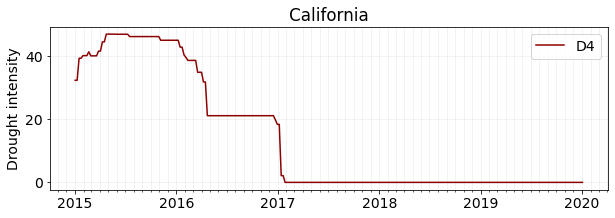

In [14]:
fig = plt.figure(figsize=(10, 3))
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
plt.plot(center_time, dataframe['D4'], color=colors[4], label='D4')
plt.legend()
ax = plt.gca()
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_ylabel("Drought intensity")
ax.set_title("California")

### CSV MultiTimeSeries

We can create a shaded time series for multiple time series plots together using the code below. Once again, we can change the y axis label and title using the last two lines of code.

Text(0.5, 1.0, 'California')

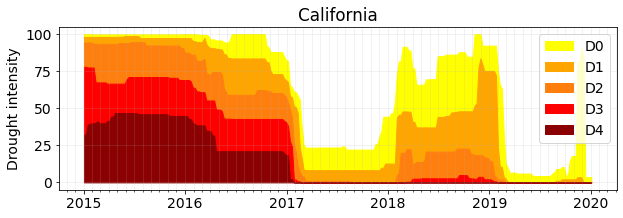

In [15]:
fig = plt.figure(figsize=(10, 3))
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
plt.fill_between(center_time, dataframe['D0'], y2=dataframe['D1'], color=colors[0], label='D0')
plt.fill_between(center_time, dataframe['D1'], y2=dataframe['D2'], color=colors[1], label='D1')
plt.fill_between(center_time, dataframe['D2'], y2=dataframe['D3'], color=colors[2], label='D2')
plt.fill_between(center_time, dataframe['D3'], y2=dataframe['D4'], color=colors[3], label='D3')
plt.fill_between(center_time, dataframe['D4'], y2=0, color=colors[4], label='D4')
plt.legend()
ax = plt.gca()
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_ylabel("Drought intensity")
ax.set_title("California")

## Plot .nc data

### NC 2D Map

We can plot data from a .NC by using some of xarray's built in plotting functions. The code below can take in a desired date ("2017-04-05") and find the nearest time point in the data, plotting the 2D data.

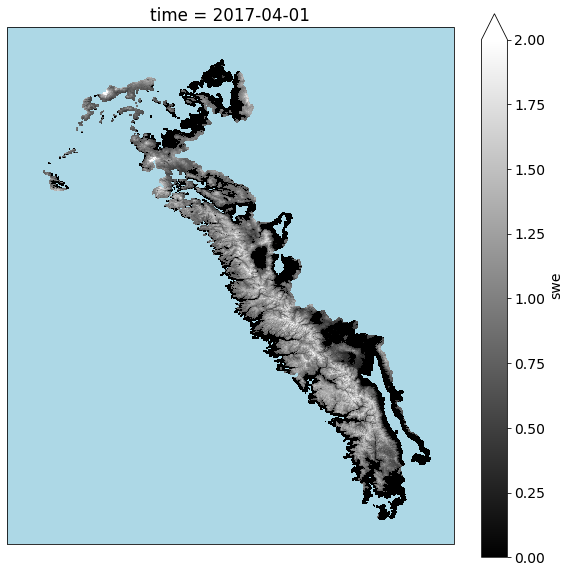

In [16]:
i_time = "2017-04-05"
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
out = xarray_data.swe.sel(time=i_time, method='nearest').plot(ax=ax, cmap='binary_r', vmin=0, vmax=2)
ax.set_aspect(1)
ax.set_facecolor('lightblue')

We can embellish this plot by adding coastlines, state boundaries, and rivers.

In [17]:
# find indicies of pixels where the data are present
index_active_swe = ~np.isnan(xarray_data.swe.data).all(axis=0)
swe_active = xarray_data.swe.data[:,index_active_swe]

x_swe = xarray_data['lon']
y_swe = xarray_data['lat']

# get gridded points of SWE data
Xswe, Yswe = np.meshgrid(x_swe, y_swe)
Xswe_active = Xswe[index_active_swe]
Yswe_active = Yswe[index_active_swe]

/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


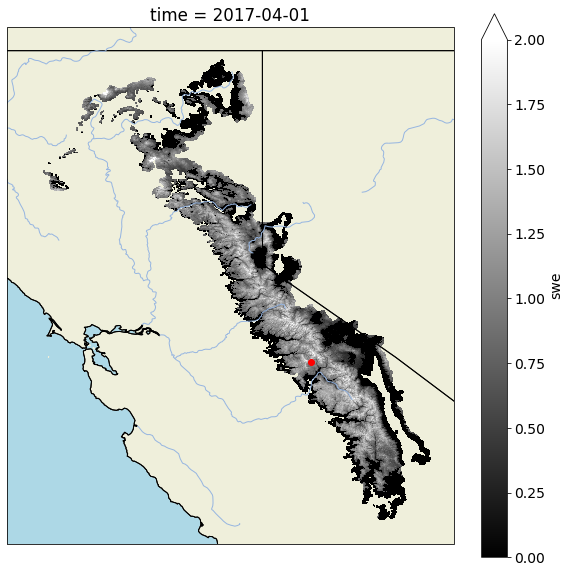

In [18]:
i_time = 100
i_pixel = -100000
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.axes.add_feature(cf.BORDERS)
ax.axes.add_feature(cf.COASTLINE)
ax.axes.add_feature(cf.LAND);
ax.axes.add_feature(cf.STATES);
#ax.stock_image();
out = xarray_data.swe.isel(time=i_time).plot(ax=ax, cmap='binary_r', vmin=0, vmax=2)
ax.axes.add_feature(cf.RIVERS);
ax.set_facecolor('lightblue')
# ax.axis('off')
ax.set_aspect(1)
ax.plot(Xswe_active[i_pixel], Yswe_active[i_pixel], 'ro')

### NC PixelTimeSeries

We can zoom in even farther and just look at a single pixel's (see the red dot above) data as a time series.

Text(0, 0.5, 'SWE (m)')

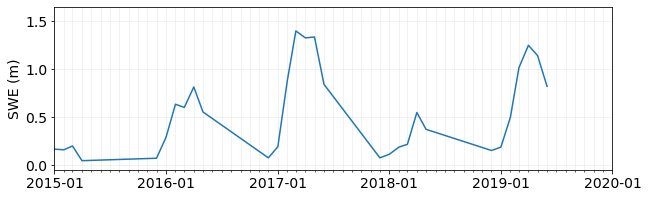

In [19]:
i_pixel = -100000
fig, ax = plt.subplots(1,1,figsize=(10, 3))
ax.plot(xarray_data.swe.time, swe_active[:,i_pixel])
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_xlim(datetime.date(2015, 1, 1), datetime.date(2020, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("SWE (m)")

### NC Histogram

We can analyze the points in our data using a histogram. This allows us to understand the distribution of the data. For example, a histogram can help us understand how the rest of the data relate to the minimum, maximum, and average of the data. The main variable here to tweak is the "bins" option, which will affect how coarse the histogram is. Try tweaking the bins option below so you can see for yourself.

Text(0, 0.5, 'counts')

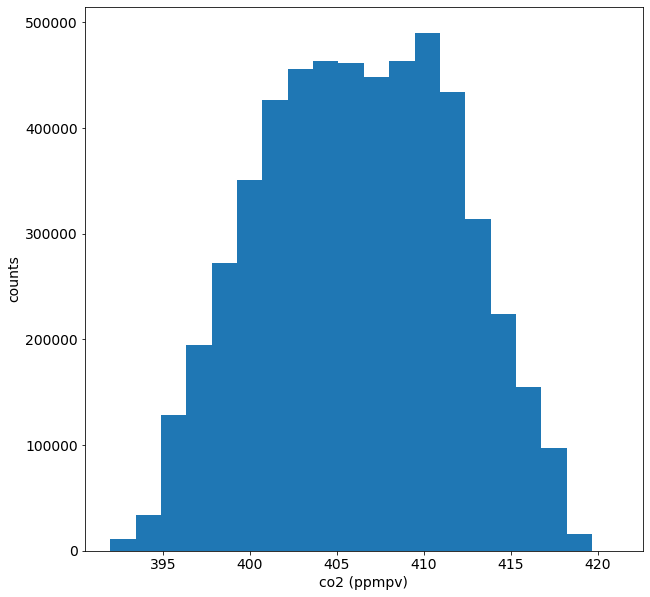

In [20]:
co2_data = xr.load_dataset('./taking_the_pulse_atmosphere_data/co2.nc')
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
out = co2_data.co2.plot.hist(ax=ax, bins=20)
ax.set_xlabel("co2 (ppmpv)")
ax.set_ylabel("counts")

Here, the x axis is telling us the value of our variable. The y axis is telling us how many times in our dataset a particular range of values is encountered. Here we see that we rarely encounter especially low or especially high values of co2. Instead we often have values closer to the average for our dataset.

# Analyzing data

## Create a linear map trend with data from a .nc file

Trend maps can tell us how different spatial regions in our data have changed over time. If you've ever created a trend line in Microsoft Excel, this is a similar process.

In [21]:
co2_data = xr.load_dataset('./taking_the_pulse_atmosphere_data/co2.nc')

In [22]:
def linear_fit(time_series, data):
    # assume the time series has a regular sampling rate
    times = np.arange(len(time_series))
    G = np.c_[times, np.ones_like(times)]
    Pinv = np.linalg.pinv(G)
    m = Pinv.dot(data)
    predicted_data = G @ m
    slope = m[0,:]
    intercept = m[1,:]
    return predicted_data, slope, intercept

In [23]:
vec = co2_data.co2.data.reshape((co2_data.co2.data.shape[0], np.prod(co2_data.co2.data.shape[1:])))
time_series = co2_data.time.data
co2_linear_fit, slope, intercept = linear_fit(time_series, vec)
co2_data['slope'] = (("y", "x"), slope.reshape(co2_data.co2.data.shape[1:]))
co2_data['intercept'] = (("y", "x"), intercept.reshape(co2_data.co2.data.shape[1:]))
co2_data['data_linear_fit'] = (("time", "y", "x"), co2_linear_fit.reshape(co2_data.co2.data.shape))

We can plot this linear trend with the code below. The "vmin" and "vmax" settings allow us to change the scale on our colorbar. If we decrease the range, our map will saturate. If we increase the range, our will wash out. The "cmap" option allows us to change our colorbar. If we want to reverse the colorbar, we can add or remove the "_r" tag. So "RdBu_r" -> "RdBu" or vice versa. Or "hot" -> "hot_r"

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

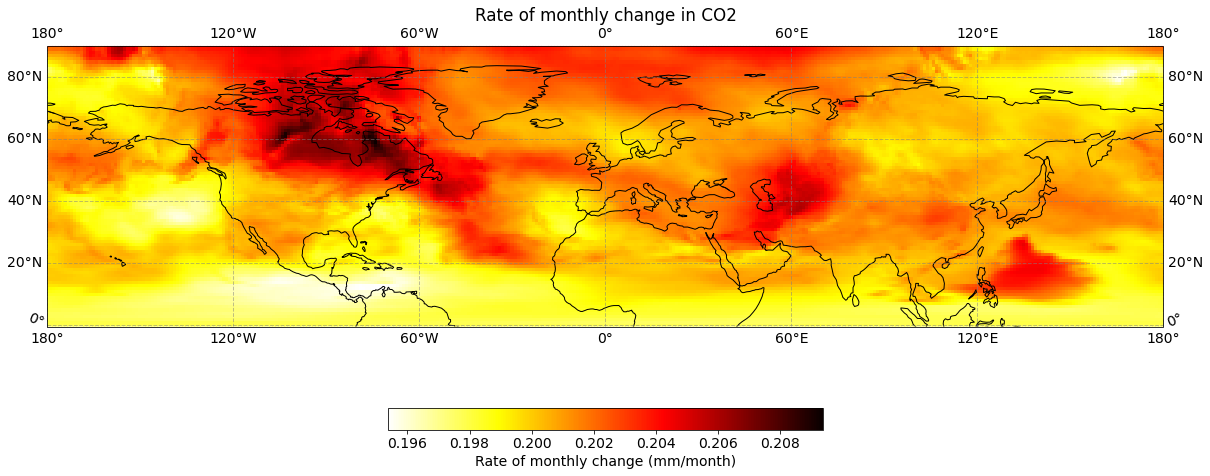

In [24]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axes.add_feature(cf.COASTLINE)
# ax.axes.add_feature(cf.LAND);

out = co2_data['slope'].plot(ax=ax, add_colorbar=False, cmap='hot_r')
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Rate of monthly change (mm/month)")
ax.set_aspect(1)
ax.set_title("Rate of monthly change in CO2")

gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

## Locate country borders using geopandas

Let's use `geopandas` and read in a `geojson` file. 

In [25]:

gdf_boundaries = gpd.read_file("./taking_the_pulse_atmosphere_data/world-administrative-boundaries.geojson")
country_names = np.sort(gdf_boundaries.name.values)
gdf_boundaries = gdf_boundaries.set_index('name')

In [26]:
widget_country = widgets.Select(options=country_names)
widget_country

Select(options=('Abyei', 'Afghanistan', 'Aksai Chin', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Ango…

In [27]:
widget_country.value

'Abyei'

In [28]:
names = [
    'China', 
    'United States of America', 
    'India', 
    'Russian Federation', 
    'Japan', 
    'Iran (Islamic Republic of)', 
    'Germany',
    'Republic of Korea',
    'Saudi Arabia',
    'Indonesia'
]

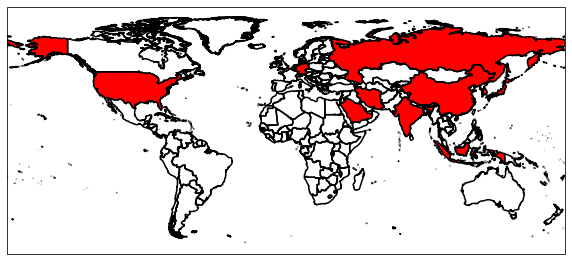

In [29]:
gdf_boundaries_top_10_co2 = gdf_boundaries.loc[names]
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
gdf_boundaries_top_10_co2.plot(ax=ax, color='r')
gdf_boundaries.boundary.plot(color='k', ax=ax)

## Extract data from country boundries

Now that we have some country boundries, we can extract data within those boundries. In an earlier example, we added to the co2 dataset by adding trend information. Due to how xarray works, it is easiest to load a copy of this dataset if we want to do a data extraction. I would also recommend doing the data extraction first and then any analysis (histograms, etc.) second.

In [30]:
co2_data_copy = xr.load_dataset('./taking_the_pulse_atmosphere_data/co2.nc')
co2_data_copy.rio.write_crs(4326, inplace=True)

<xarray.Dataset>
Dimensions:      (time: 84, lat: 180, lon: 360)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2021-12-31
  * lon          (lon) float64 -179.8 -178.8 -177.8 -176.8 ... 177.2 178.2 179.2
  * lat          (lat) float64 89.75 88.75 87.75 86.75 ... -87.25 -88.25 -89.25
    spatial_ref  int64 0
Data variables:
    co2          (time, lat, lon) float64 400.6 400.6 400.6 ... 411.5 411.5
Attributes:
    Description:    CO2 data
    Unit:           ppmv (part per million per volume)
    Data document:  https://disc.gsfc.nasa.gov/datasets/OCO2_GEOS_L3CO2_MONTH...

In [31]:
country_boundary = gdf_boundaries.loc[['China']]
co2_data_copy.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
co2_data_clipped = co2_data_copy.rio.clip(country_boundary.geometry.apply(mapping), country_boundary.crs, drop=False)

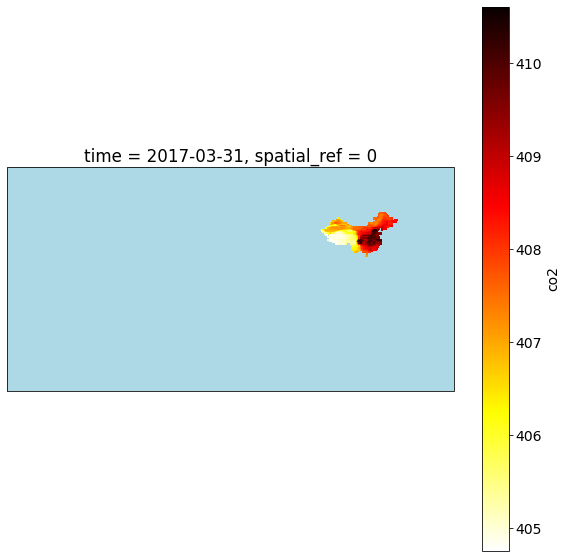

In [32]:
i_time = "2017-04-05"
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
out = co2_data_clipped.co2.sel(time=i_time, method='nearest').plot(ax=ax, cmap='hot_r')
ax.set_aspect(1)
ax.set_facecolor('lightblue')